In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import mlflow
import pytorch_lightning as pl
from pytorch_lightning.utilities.cloud_io import load as pl_load


In [3]:
from src.model import HemelingNet, HemelingRotNet
from src.classifier_net import BinaryClassifierNet, ExportValidation
from run_train import load_dataset, parse_config, setup_model

In [40]:
EXP = '/home/gaby/These/src/Fundus/RotInvariance/3-Git/experiments/0.yaml'
cfg = parse_config(EXP)
#cfg.training['dataset-file'] = '/home/gaby/These/src/Fundus/RotInvariance/3-Git/vessels.h5'
trainD, validD, testD = load_dataset(cfg)

In [9]:
model = setup_model(cfg.model)
net = BinaryClassifierNet(model=model)
state_dict = pl_load(EXP+cfg['experiment']['name']+'-{0:0=3d}/best-acc.ckpt'.format(25))['state_dict']
net.load_state_dict(state_dict)
net.eval()
None

RuntimeError: Error(s) in loading state_dict for BinaryClassifierNet:
	Missing key(s) in state_dict: "model.conv1.0.conv.asym_half_weight", "model.conv1.0.conv.sym_half_weight", "model.conv1.0.bn_relu.0.weight", "model.conv1.0.bn_relu.1.weight", "model.conv1.0.bn_relu.1.bias", "model.conv1.0.bn_relu.1.running_mean", "model.conv1.0.bn_relu.1.running_var", "model.conv1.1.conv.asym_half_weight", "model.conv1.1.conv.sym_half_weight", "model.conv1.1.bn_relu.0.weight", "model.conv1.1.bn_relu.1.weight", "model.conv1.1.bn_relu.1.bias", "model.conv1.1.bn_relu.1.running_mean", "model.conv1.1.bn_relu.1.running_var", "model.conv2.0.conv.asym_half_weight", "model.conv2.0.conv.sym_half_weight", "model.conv2.0.bn_relu.0.weight", "model.conv2.0.bn_relu.1.weight", "model.conv2.0.bn_relu.1.bias", "model.conv2.0.bn_relu.1.running_mean", "model.conv2.0.bn_relu.1.running_var", "model.conv2.1.conv.asym_half_weight", "model.conv2.1.conv.sym_half_weight", "model.conv2.1.bn_relu.0.weight", "model.conv2.1.bn_relu.1.weight", "model.conv2.1.bn_relu.1.bias", "model.conv2.1.bn_relu.1.running_mean", "model.conv2.1.bn_relu.1.running_var", "model.conv3.0.conv.asym_half_weight", "model.conv3.0.conv.sym_half_weight", "model.conv3.0.bn_relu.0.weight", "model.conv3.0.bn_relu.1.weight", "model.conv3.0.bn_relu.1.bias", "model.conv3.0.bn_relu.1.running_mean", "model.conv3.0.bn_relu.1.running_var", "model.conv3.1.conv.asym_half_weight", "model.conv3.1.conv.sym_half_weight", "model.conv3.1.bn_relu.0.weight", "model.conv3.1.bn_relu.1.weight", "model.conv3.1.bn_relu.1.bias", "model.conv3.1.bn_relu.1.running_mean", "model.conv3.1.bn_relu.1.running_var", "model.conv4.0.conv.asym_half_weight", "model.conv4.0.conv.sym_half_weight", "model.conv4.0.bn_relu.0.weight", "model.conv4.0.bn_relu.1.weight", "model.conv4.0.bn_relu.1.bias", "model.conv4.0.bn_relu.1.running_mean", "model.conv4.0.bn_relu.1.running_var", "model.conv4.1.conv.asym_half_weight", "model.conv4.1.conv.sym_half_weight", "model.conv4.1.bn_relu.0.weight", "model.conv4.1.bn_relu.1.weight", "model.conv4.1.bn_relu.1.bias", "model.conv4.1.bn_relu.1.running_mean", "model.conv4.1.bn_relu.1.running_var", "model.conv5.0.conv.asym_half_weight", "model.conv5.0.conv.sym_half_weight", "model.conv5.0.bn_relu.0.weight", "model.conv5.0.bn_relu.1.weight", "model.conv5.0.bn_relu.1.bias", "model.conv5.0.bn_relu.1.running_mean", "model.conv5.0.bn_relu.1.running_var", "model.conv5.1.conv.asym_half_weight", "model.conv5.1.conv.sym_half_weight", "model.conv5.1.bn_relu.0.weight", "model.conv5.1.bn_relu.1.weight", "model.conv5.1.bn_relu.1.bias", "model.conv5.1.bn_relu.1.running_mean", "model.conv5.1.bn_relu.1.running_var", "model.conv6.0.conv.asym_half_weight", "model.conv6.0.conv.sym_half_weight", "model.conv6.0.bn_relu.0.weight", "model.conv6.0.bn_relu.1.weight", "model.conv6.0.bn_relu.1.bias", "model.conv6.0.bn_relu.1.running_mean", "model.conv6.0.bn_relu.1.running_var", "model.conv6.1.conv.asym_half_weight", "model.conv6.1.conv.sym_half_weight", "model.conv6.1.bn_relu.0.weight", "model.conv6.1.bn_relu.1.weight", "model.conv6.1.bn_relu.1.bias", "model.conv6.1.bn_relu.1.running_mean", "model.conv6.1.bn_relu.1.running_var", "model.conv7.0.conv.asym_half_weight", "model.conv7.0.conv.sym_half_weight", "model.conv7.0.bn_relu.0.weight", "model.conv7.0.bn_relu.1.weight", "model.conv7.0.bn_relu.1.bias", "model.conv7.0.bn_relu.1.running_mean", "model.conv7.0.bn_relu.1.running_var", "model.conv7.1.conv.asym_half_weight", "model.conv7.1.conv.sym_half_weight", "model.conv7.1.bn_relu.0.weight", "model.conv7.1.bn_relu.1.weight", "model.conv7.1.bn_relu.1.bias", "model.conv7.1.bn_relu.1.running_mean", "model.conv7.1.bn_relu.1.running_var", "model.conv8.0.conv.asym_half_weight", "model.conv8.0.conv.sym_half_weight", "model.conv8.0.bn_relu.0.weight", "model.conv8.0.bn_relu.1.weight", "model.conv8.0.bn_relu.1.bias", "model.conv8.0.bn_relu.1.running_mean", "model.conv8.0.bn_relu.1.running_var", "model.conv8.1.conv.asym_half_weight", "model.conv8.1.conv.sym_half_weight", "model.conv8.1.bn_relu.0.weight", "model.conv8.1.bn_relu.1.weight", "model.conv8.1.bn_relu.1.bias", "model.conv8.1.bn_relu.1.running_mean", "model.conv8.1.bn_relu.1.running_var", "model.conv9.0.conv.asym_half_weight", "model.conv9.0.conv.sym_half_weight", "model.conv9.0.bn_relu.0.weight", "model.conv9.0.bn_relu.1.weight", "model.conv9.0.bn_relu.1.bias", "model.conv9.0.bn_relu.1.running_mean", "model.conv9.0.bn_relu.1.running_var", "model.conv9.1.conv.asym_half_weight", "model.conv9.1.conv.sym_half_weight", "model.conv9.1.bn_relu.0.weight", "model.conv9.1.bn_relu.1.weight", "model.conv9.1.bn_relu.1.bias", "model.conv9.1.bn_relu.1.running_mean", "model.conv9.1.bn_relu.1.running_var". 
	Unexpected key(s) in state_dict: "model.conv10.conv.asym_half_weight", "model.conv10.conv.sym_half_weight", "model.conv10.bn_relu.0.weight", "model.conv10.bn_relu.1.weight", "model.conv10.bn_relu.1.bias", "model.conv10.bn_relu.1.running_mean", "model.conv10.bn_relu.1.running_var", "model.conv10.bn_relu.1.num_batches_tracked", "model.conv11.conv.asym_half_weight", "model.conv11.conv.sym_half_weight", "model.conv11.bn_relu.0.weight", "model.conv11.bn_relu.1.weight", "model.conv11.bn_relu.1.bias", "model.conv11.bn_relu.1.running_mean", "model.conv11.bn_relu.1.running_var", "model.conv11.bn_relu.1.num_batches_tracked", "model.conv12.conv.asym_half_weight", "model.conv12.conv.sym_half_weight", "model.conv12.bn_relu.0.weight", "model.conv12.bn_relu.1.weight", "model.conv12.bn_relu.1.bias", "model.conv12.bn_relu.1.running_mean", "model.conv12.bn_relu.1.running_var", "model.conv12.bn_relu.1.num_batches_tracked", "model.conv13.conv.asym_half_weight", "model.conv13.conv.sym_half_weight", "model.conv13.bn_relu.0.weight", "model.conv13.bn_relu.1.weight", "model.conv13.bn_relu.1.bias", "model.conv13.bn_relu.1.running_mean", "model.conv13.bn_relu.1.running_var", "model.conv13.bn_relu.1.num_batches_tracked", "model.conv14.conv.asym_half_weight", "model.conv14.conv.sym_half_weight", "model.conv14.bn_relu.0.weight", "model.conv14.bn_relu.1.weight", "model.conv14.bn_relu.1.bias", "model.conv14.bn_relu.1.running_mean", "model.conv14.bn_relu.1.running_var", "model.conv14.bn_relu.1.num_batches_tracked", "model.conv15.conv.asym_half_weight", "model.conv15.conv.sym_half_weight", "model.conv15.bn_relu.0.weight", "model.conv15.bn_relu.1.weight", "model.conv15.bn_relu.1.bias", "model.conv15.bn_relu.1.running_mean", "model.conv15.bn_relu.1.running_var", "model.conv15.bn_relu.1.num_batches_tracked", "model.conv16.conv.asym_half_weight", "model.conv16.conv.sym_half_weight", "model.conv16.bn_relu.0.weight", "model.conv16.bn_relu.1.weight", "model.conv16.bn_relu.1.bias", "model.conv16.bn_relu.1.running_mean", "model.conv16.bn_relu.1.running_var", "model.conv16.bn_relu.1.num_batches_tracked", "model.conv17.conv.asym_half_weight", "model.conv17.conv.sym_half_weight", "model.conv17.bn_relu.0.weight", "model.conv17.bn_relu.1.weight", "model.conv17.bn_relu.1.bias", "model.conv17.bn_relu.1.running_mean", "model.conv17.bn_relu.1.running_var", "model.conv17.bn_relu.1.num_batches_tracked", "model.conv18.conv.asym_half_weight", "model.conv18.conv.sym_half_weight", "model.conv18.bn_relu.0.weight", "model.conv18.bn_relu.1.weight", "model.conv18.bn_relu.1.bias", "model.conv18.bn_relu.1.running_mean", "model.conv18.bn_relu.1.running_var", "model.conv18.bn_relu.1.num_batches_tracked", "model.conv1.conv.asym_half_weight", "model.conv1.conv.sym_half_weight", "model.conv1.bn_relu.0.weight", "model.conv1.bn_relu.1.weight", "model.conv1.bn_relu.1.bias", "model.conv1.bn_relu.1.running_mean", "model.conv1.bn_relu.1.running_var", "model.conv1.bn_relu.1.num_batches_tracked", "model.conv2.conv.asym_half_weight", "model.conv2.conv.sym_half_weight", "model.conv2.bn_relu.0.weight", "model.conv2.bn_relu.1.weight", "model.conv2.bn_relu.1.bias", "model.conv2.bn_relu.1.running_mean", "model.conv2.bn_relu.1.running_var", "model.conv2.bn_relu.1.num_batches_tracked", "model.conv3.conv.asym_half_weight", "model.conv3.conv.sym_half_weight", "model.conv3.bn_relu.0.weight", "model.conv3.bn_relu.1.weight", "model.conv3.bn_relu.1.bias", "model.conv3.bn_relu.1.running_mean", "model.conv3.bn_relu.1.running_var", "model.conv3.bn_relu.1.num_batches_tracked", "model.conv4.conv.asym_half_weight", "model.conv4.conv.sym_half_weight", "model.conv4.bn_relu.0.weight", "model.conv4.bn_relu.1.weight", "model.conv4.bn_relu.1.bias", "model.conv4.bn_relu.1.running_mean", "model.conv4.bn_relu.1.running_var", "model.conv4.bn_relu.1.num_batches_tracked", "model.conv5.conv.asym_half_weight", "model.conv5.conv.sym_half_weight", "model.conv5.bn_relu.0.weight", "model.conv5.bn_relu.1.weight", "model.conv5.bn_relu.1.bias", "model.conv5.bn_relu.1.running_mean", "model.conv5.bn_relu.1.running_var", "model.conv5.bn_relu.1.num_batches_tracked", "model.conv6.conv.asym_half_weight", "model.conv6.conv.sym_half_weight", "model.conv6.bn_relu.0.weight", "model.conv6.bn_relu.1.weight", "model.conv6.bn_relu.1.bias", "model.conv6.bn_relu.1.running_mean", "model.conv6.bn_relu.1.running_var", "model.conv6.bn_relu.1.num_batches_tracked", "model.conv7.conv.asym_half_weight", "model.conv7.conv.sym_half_weight", "model.conv7.bn_relu.0.weight", "model.conv7.bn_relu.1.weight", "model.conv7.bn_relu.1.bias", "model.conv7.bn_relu.1.running_mean", "model.conv7.bn_relu.1.running_var", "model.conv7.bn_relu.1.num_batches_tracked", "model.conv8.conv.asym_half_weight", "model.conv8.conv.sym_half_weight", "model.conv8.bn_relu.0.weight", "model.conv8.bn_relu.1.weight", "model.conv8.bn_relu.1.bias", "model.conv8.bn_relu.1.running_mean", "model.conv8.bn_relu.1.running_var", "model.conv8.bn_relu.1.num_batches_tracked", "model.conv9.conv.asym_half_weight", "model.conv9.conv.sym_half_weight", "model.conv9.bn_relu.0.weight", "model.conv9.bn_relu.1.weight", "model.conv9.bn_relu.1.bias", "model.conv9.bn_relu.1.running_mean", "model.conv9.bn_relu.1.running_var", "model.conv9.bn_relu.1.num_batches_tracked". 

In [6]:
tester = pl.Trainer(gpus=[0])
net.testset_names, data = list(zip(*testD.items()))
tester.test(net, data)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'MESSIDOR-acc/dataloader_idx_0': tensor(0.7327),
 'MESSIDOR-iou/dataloader_idx_0': tensor(0.4844),
 'MESSIDOR-roc/dataloader_idx_0': tensor(0.7787)}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'HRF-acc/dataloader_idx_1': tensor(0.5806),
 'HRF-iou/dataloader_idx_1': tensor(0.3394),
 'HRF-roc/dataloader_idx_1': tensor(0.6783)}
--------------------------------------------------------------------------------
DATALOADER:2 TEST RESULTS
{'DRIVE-acc/dataloader_idx_2': tensor(0.6767),
 'DRIVE-iou/dataloader_idx_2': tensor(0.4461),
 'DRIVE-roc/dataloader_idx_2': tensor(0.8119)}
--------------------------------------------------------------------------------


[{'MESSIDOR-acc/dataloader_idx_0': 0.7326777577400208,
  'MESSIDOR-roc/dataloader_idx_0': 0.7787101864814758,
  'MESSIDOR-iou/dataloader_idx_0': 0.48443326354026794},
 {'HRF-acc/dataloader_idx_1': 0.5805894732475281,
  'HRF-roc/dataloader_idx_1': 0.6782897114753723,
  'HRF-iou/dataloader_idx_1': 0.3394272029399872},
 {'DRIVE-acc/dataloader_idx_2': 0.6766659021377563,
  'DRIVE-roc/dataloader_idx_2': 0.8118972778320312,
  'DRIVE-iou/dataloader_idx_2': 0.44608601927757263}]

In [41]:
for batch in testD['DRIVE']:
    r = batch
    break

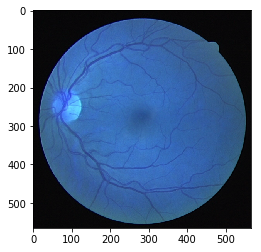

In [47]:
x = r['x'][0,3:].detach().permute((1,2,0))
plt.imshow(x)

In [53]:
mask = r['mask'][0,3:].detach().permute((1,2,0))
plt.imshow(x)

RuntimeError: number of dims don't match in permute